In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import os
#for imgstr in range(50):
imgstr = "dum"

In [2]:
    nt = 20 #length and width of frame
    nth = (nt-2.0)/2.0
    dum = np.ones((nt,nt)) #dum is the np.array containing all pixels
    print(dum)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [3]:
    classes = ['ne','nw','sw','se'] #set of possible directions
    classes_b = [[1,1],[1,-1],[-1,-1],[-1, 1]] #corresponding values
    diri = np.random.randint(4) #random choice
    b = classes_b[diri] #b determines direction to 2nd boot
    label = classes[diri]
    print("label: ",label)

label:  nw


In [4]:
    pts = np.random.randint(2,high=(nt-2),size=(1,2)) #First boot
    print("pts: ",pts)

pts:  [[5 8]]


In [5]:
    a = min(pts[0,0],abs(nt-pts[0,0]),pts[0,1],abs(nt-pts[0,1])) #position limits
    #       maximum size. Note: this could be improved. By taking into account b, 
    #       larger triangles could be placed into the edge.
    c = np.random.randint(min(a,1),high=max(a,2),size=(1,2)) # distance to 2nd boot
    pts = np.concatenate((pts,np.abs(pts+b*c))) #adds second boot to pts array
    print("pts: \n",pts)

pts: 
 [[5 8]
 [8 6]]


In [6]:
    pts3 = np.array([[pts[0,0],pts[1,1]]]) # third point completes the vertices
    pts = np.concatenate((pts,pts3))
    ptsl = pts.tolist()
    print("pts: \n",pts)

pts: 
 [[5 8]
 [8 6]
 [5 6]]


In [7]:
    #Filling in the boots with zeros
    dum[pts[0,0],pts[:,1].min():pts[:,1].max()+1]=0 
    dum[pts[:,0].min():pts[:,0].max()+1,pts[1,1]]=0
    print(dum)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [8]:
    ####    To determine visually which corner is which:
    #for i in range(3):
    #    d=i+4
    #    dum[pts[i,0],pts[i,1]]=0
    ####
    
    #Collecting points for Matplotlib
    for i in range(int(np.abs(pts[1]-pts[2]).max())):
        ptsl.append([pts[1,0]-i*np.sign((pts[1]-pts[2]).mean()),pts[1,1]])
    for i in range(int(np.abs(pts[0]-pts[2]).max())):
        ptsl.append([pts[0,0],pts[0,1]-i*np.sign((pts[0]-pts[2]).mean())])

In [9]:
    #Important parameters for filling in
    m = (pts[0,1]-pts[1,1])/(pts[0,0]-pts[1,0]) #slope of hypotenuse 
    dy = pts[0,0]-pts[1,0] #Confusing: x coordinate specified by y position
    dx = pts[0,1]-pts[1,1]
    ady = np.abs(dy) #specifies distance to fill-in
    adx = np.abs(dx) #specifies distance to fill-in

In [10]:
    #Filling in points in triangle
    for yy in range(ady-1): 
        y = pts[2,0]-np.sign(dy)*(yy+1)
        for xx in range(adx-(int(np.round((yy+1)*abs(m))))): #Jump accords to slope
            x = pts[2,1]+np.sign(dx)*(xx+1)
            dum[y,x]=0
            ptsl.append([y,x]) #for matplotlib plotting
    print(dum)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [11]:
    #Data point
    s = [dum,label]

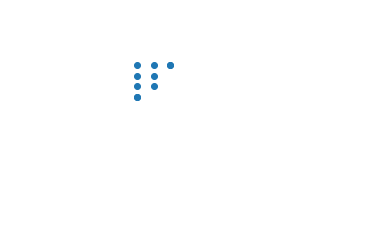

In [12]:
    #Matplotlibing
    ptsl=np.array(ptsl)
    f = open('ptl'+str(imgstr)+'_'+str(label)+'.txt','w')
    json.dump(dum.tolist(),f)
    f.close()
    fig = plt.figure()
    plt.scatter(ptsl[:,1],nt-ptsl[:,0])
    plt.xlim((0,nt))
    plt.ylim((0,nt))
    plt.axis('off')
#    plt.show(fig)
    fig.savefig('ptl'+str(imgstr)+'_'+str(label)+'.png')